In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style and matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

def collect_data(symbol, start_date):
    end_date = datetime.now().strftime('%Y-%m-%d')
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data



[*********************100%%**********************]  1 of 1 completed


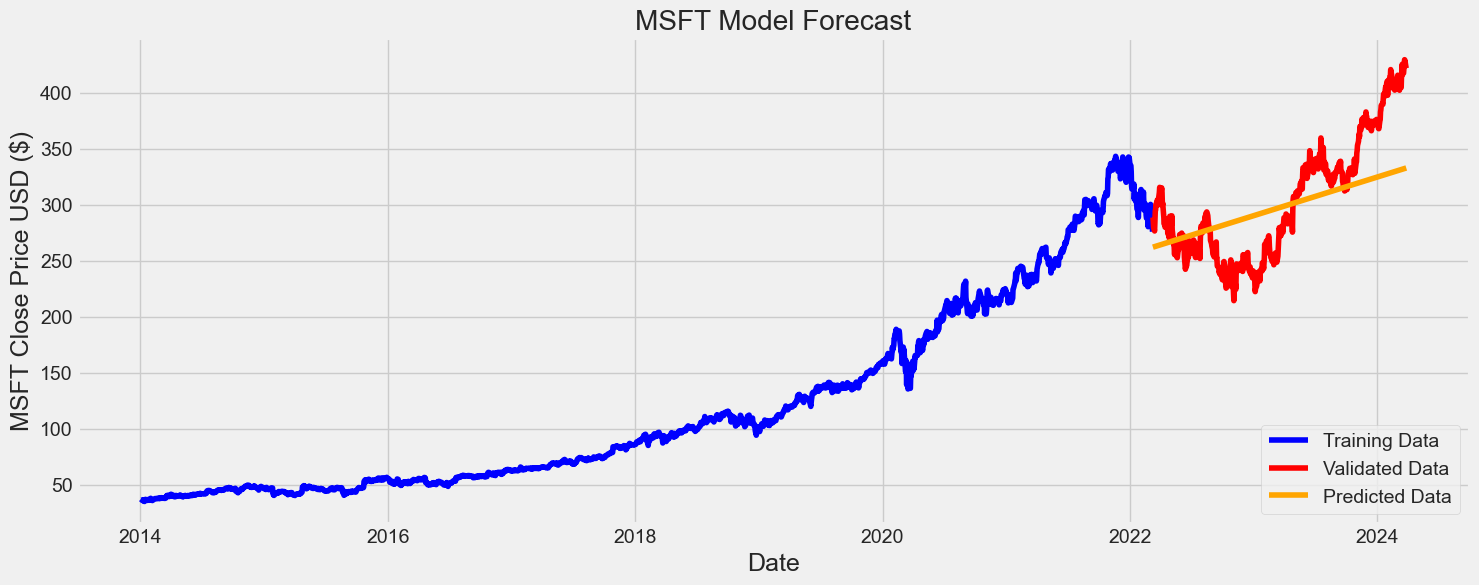

Training RMSE: 33.12915975087477
Testing RMSE: 40.09410155588519


In [21]:
from sklearn.metrics import mean_squared_error
import math

def plot_predictions(stock, data, training_data_len):
    # Prepare the data
    data['Date'] = data.index
    data.reset_index(drop=True, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date_Ordinal'] = data['Date'].apply(lambda date: date.toordinal())
    
    # Split the data into training and testing sets
    X = data[['Date_Ordinal']].values.reshape(-1, 1)
    y = data['Close'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    data['Predictions'] = model.predict(X)
    
    # Split the data for visualization
    train = data[:training_data_len]
    valid = data[training_data_len:]
    
    # Visualize the data
    plt.figure(figsize=(16,6))
    title = stock + ' Model Forecast'
    ylabel = stock + ' Close Price USD ($)'
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.plot(train['Date'], train['Close'], label='Training Data', color='blue')
    plt.plot(valid['Date'], valid['Close'], label='Validated Data', color='red')
    plt.plot(valid['Date'], valid['Predictions'], label='Predicted Data', color='orange')
    plt.legend(loc='lower right')
    plt.show()
    
    return train, valid  # Return training and validation data

# Test the function
data = collect_data('MSFT', '2014-01-01')
training_data_len = int(len(data) * 0.8)  # 80% of data for training
train, valid = plot_predictions('MSFT', data, training_data_len)

# Calculate RMSE for training data
train_rmse = calculate_rmse(train['Close'], train['Predictions'])
print("Training RMSE:", train_rmse)

# Calculate RMSE for testing data
test_rmse = calculate_rmse(valid['Close'], valid['Predictions'])
print("Testing RMSE:", test_rmse)
